# Name: Prathamesh Arvind Jadhav
# Roll No: 3014

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Computer Vision/AI.jpg')

In [3]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
orb = cv2.ORB_create(nfeatures=500)
kp_orb1, des_orb1 = orb.detectAndCompute(gray1, None)
kp_orb2, des_orb2 = orb.detectAndCompute(gray2, None)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(des_orb1, des_orb2)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)
img_match_orb = cv2.drawMatches(img1, kp_orb1, img2, kp_orb2, matches_orb[:20],
None, flags=2)

In [5]:
sift = cv2.SIFT_create()
kp_sift1, des_sift1 = sift.detectAndCompute(gray1, None)
kp_sift2, des_sift2 = sift.detectAndCompute(gray2, None)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(des_sift1, des_sift2)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)
img_match_sift = cv2.drawMatches(img1, kp_sift1, img2, kp_sift2, matches_sift[:20],
None, flags=2)

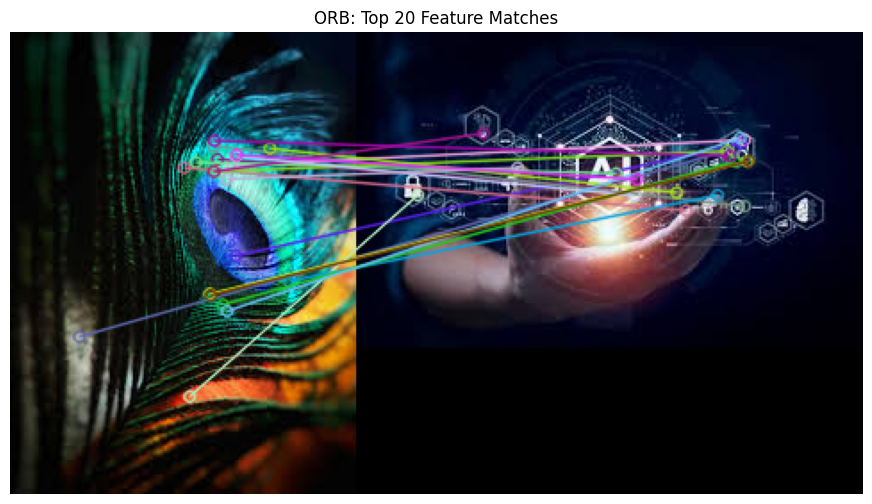

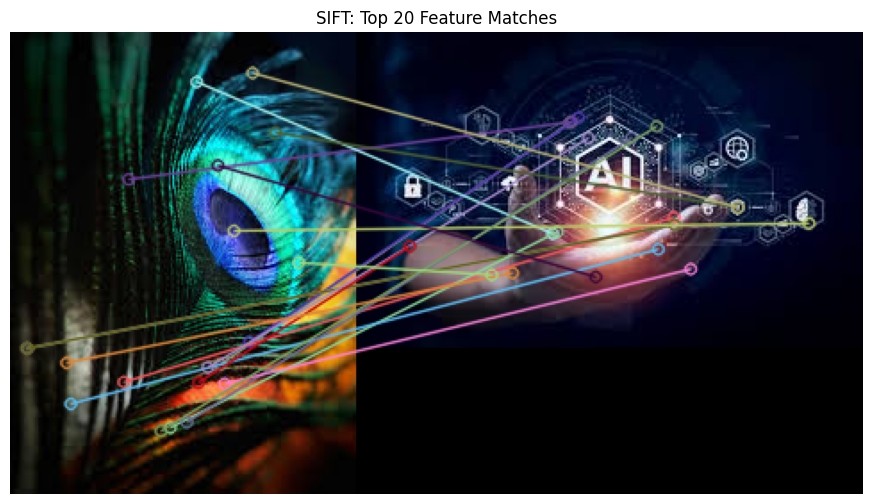

In [8]:
def show_matches(img, title):
   plt.figure(figsize=(12, 6))
   plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
   plt.title(title)
   plt.axis('off')
   plt.show()
show_matches(img_match_orb, "ORB: Top 20 Feature Matches")
show_matches(img_match_sift, "SIFT: Top 20 Feature Matches")